In [1]:
import logging
from large_gcs.graph_generators.contact_graph_generator import (
    ContactGraphGeneratorParams,
    ContactGraphGenerator,
)
from large_gcs.contact.contact_regions_set import ContactRegionParams
from large_gcs.geometry.polyhedron import Polyhedron
from large_gcs.graph.contact_graph import ContactGraph
from large_gcs.algorithms.search_algorithm import ReexploreLevel
from large_gcs.algorithms.gcs_astar import GcsAstar
from large_gcs.algorithms.gcs_astar_convex_restriction import GcsAstarConvexRestriction
from large_gcs.graph.contact_cost_constraint_factory import (
    contact_shortcut_edge_cost_factory_under,
    contact_shortcut_edge_cost_factory_over_obj_weighted,
)
from large_gcs.cost_estimators.shortcut_edge_ce import ShortcutEdgeCE
from large_gcs.cost_estimators.factored_collision_free_ce import FactoredCollisionFreeCE

import numpy as np
from copy import deepcopy
from IPython.display import HTML


np.set_printoptions(formatter={"float": lambda x: "{0:0.3f}".format(x)})
logging.basicConfig(level=logging.INFO)
# logging.getLogger().setLevel(logging.INFO)
logging.getLogger("drake").setLevel(logging.WARNING)
logging.getLogger("large_gcs").setLevel(logging.DEBUG)

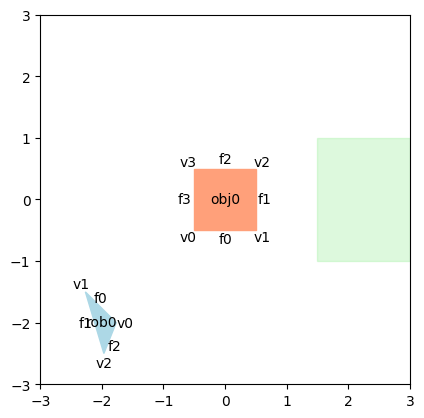

In [22]:
ws = 3
target_regions = [
    ContactRegionParams(region_vertices=[[1.5,-1], [1.5,1], [3,1], [3,-1]],
                  obj_indices=[0]),
]

params = ContactGraphGeneratorParams(
    name="cg_simple_3",
    obs_vertices=[],
    obj_vertices=[np.array([[0, 0], [1, 0], [1, 1], [0, 1]]) + np.array([2.5, 0.5])],
    rob_vertices=[np.array([[-1, -1], [-1.5, -0.5], [-1.2, -1.5]])],
    source_obj_pos=[[0, 0]],
    source_rob_pos=[[-2, -2]],
    target_region_params=target_regions,
    n_pos_per_set=2,
    workspace=[[-ws, ws], [-ws, ws]],
)
generator = ContactGraphGenerator(params)
generator.plot()

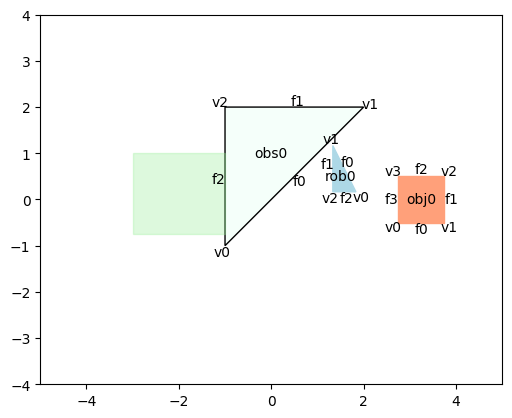

In [10]:
ws_x = 5
ws_y = 4
target_region_params = [
    ContactRegionParams(region_vertices=[[-3,-0.75], [-3,1], [-1,-0.75], [-1,1]],
                  obj_indices=[0]),
]
params = ContactGraphGeneratorParams(
    name="cg_trichal4",
    obs_vertices=[[[-1, 2], [-1, -1], [2, 2]]],
    obj_vertices=[[[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]]],
    rob_vertices=[[[3, 1], [3, 0], [3.5, 0]]],
    source_obj_pos=[[3.25, 0]],
    source_rob_pos=[[1.5, 0.5]],
    target_region_params=target_region_params,
    n_pos_per_set=2,
    workspace=[[-ws_x, ws_x], [-ws_y, ws_y]],
)

generator = ContactGraphGenerator(params)
generator.plot()

In [ ]:
generator.generate()

In [2]:
# cg = ContactGraph.load_from_file(params.graph_file_path)
cg = ContactGraph.load_from_file(
    ContactGraphGeneratorParams.graph_file_path_from_name("cg_simple_3")
    )

INFO:large_gcs.graph.contact_graph:Loading 11 contact pair modes for 2 bodies...
INFO:large_gcs.graph.contact_graph:Generating force constraints for 11 sets...


Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-04


100%|██████████| 11/11 [00:00<00:00, 2722.77it/s]
INFO:large_gcs.graph.contact_graph:Generating contact sets for 11 sets...
100%|██████████| 11/11 [00:00<00:00, 45.81it/s]
INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 13/13 [00:00<00:00, 6746.59it/s]
INFO:large_gcs.graph.graph:Adding 13 vertices to graph...
100%|██████████| 13/13 [00:00<00:00, 10374.04it/s]
INFO:large_gcs.graph.contact_graph:Creating edge costs...
100%|██████████| 72/72 [00:00<00:00, 8909.83it/s]
INFO:large_gcs.graph.contact_graph:Creating edge constraints...
100%|██████████| 72/72 [00:00<00:00, 4569.72it/s]
INFO:large_gcs.graph.graph:Adding 72 edges to graph...
100%|██████████| 72/72 [00:00<00:00, 4124.42it/s]
INFO:large_gcs.graph.contact_graph:Created contact graph: GraphParams(dim_bounds=(4, 16), n_vertices=13, n_edges=72, source=[array([0, 0]), array([-2, -2])], target='regions', workspace=array([[-3,  3],
       [-3,  3]]), default_costs_constraints=None)


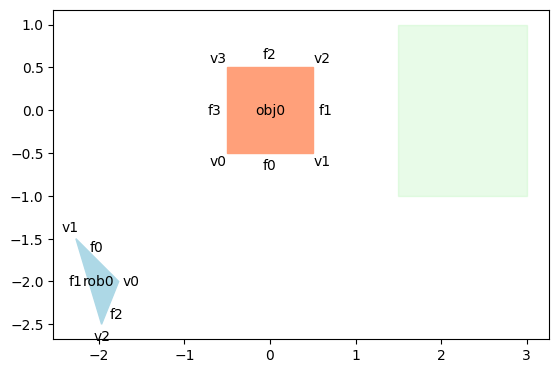

In [24]:
cg.plot()

In [3]:
cg.incoming_edges("target")

[Edge(u="('IC|obj0_f0-rob0_v1',)", v='target', costs=[<pydrake.solvers.LinearCost object at 0x17b07cb30>], constraints=[<pydrake.solvers.LinearEqualityConstraint object at 0x17b066330>], gcs_edge=<pydrake.geometry.optimization.GraphOfConvexSets.Edge object at 0x171a82130>),
 Edge(u="('IC|obj0_f1-rob0_v1',)", v='target', costs=[<pydrake.solvers.LinearCost object at 0x17b07cb70>], constraints=[<pydrake.solvers.LinearEqualityConstraint object at 0x17b07f370>], gcs_edge=<pydrake.geometry.optimization.GraphOfConvexSets.Edge object at 0x12bb936b0>),
 Edge(u="('IC|obj0_f2-rob0_v2',)", v='target', costs=[<pydrake.solvers.LinearCost object at 0x17b07cab0>], constraints=[<pydrake.solvers.LinearEqualityConstraint object at 0x11021dd70>], gcs_edge=<pydrake.geometry.optimization.GraphOfConvexSets.Edge object at 0x12bb451b0>),
 Edge(u="('IC|obj0_f3-rob0_v0',)", v='target', costs=[<pydrake.solvers.LinearCost object at 0x17b07e3f0>], constraints=[<pydrake.solvers.LinearEqualityConstraint object at 0x1

In [4]:
cg.outgoing_edges("source")

[Edge(u='source', v="('NC|obj0_f0-rob0_v1',)", costs=[<pydrake.solvers.LinearCost object at 0x17b077c30>], constraints=[<pydrake.solvers.LinearEqualityConstraint object at 0x17b098730>], gcs_edge=<pydrake.geometry.optimization.GraphOfConvexSets.Edge object at 0x17b092c30>),
 Edge(u='source', v="('NC|obj0_f3-rob0_v0',)", costs=[<pydrake.solvers.LinearCost object at 0x17b070870>], constraints=[<pydrake.solvers.LinearEqualityConstraint object at 0x1103c9630>], gcs_edge=<pydrake.geometry.optimization.GraphOfConvexSets.Edge object at 0x17b071330>)]

In [ ]:
# sol = cg.solve_shortest_path(use_convex_relaxation=False)
# print(sol)

In [12]:
# cost_estimator = FactoredCollisionFreeCE(cg, use_combined_gcs=False, obj_multiplier=100)

# gcs_astar = GcsAstarConvexRestriction(
#     cg,
#     cost_estimator=cost_estimator,
#     reexplore_level=ReexploreLevel.PARTIAL,
# )
# sol = gcs_astar.run()

In [13]:
# anim = cg.animate_solution()
# HTML(anim.to_html5_video())

In [5]:
cost_estimator = ShortcutEdgeCE(cg, shortcut_edge_cost_factory=contact_shortcut_edge_cost_factory_over_obj_weighted)
# cost_estimator = FactoredCollisionFreeCE(cg, use_combined_gcs=True, obj_multiplier=100)

gcs_astar = GcsAstar(
    cg,
    cost_estimator=cost_estimator,
    # reexplore_level=ReexploreLevel.NONE,
)
sol = gcs_astar.run()

INFO:large_gcs.algorithms.gcs_astar:
n_vertices_visited: 2, n_edges_visited: 0, n_vertices_explored: 0, vertex_coverage: 0.154, edge_coverage: 0, time_wall_clock: 0, n_gcs_solves: 0, gcs_solve_time_total: 0, gcs_solve_time_iter_mean: 0, gcs_solve_time_last_10_mean: 0, gcs_solve_time_iter_std: 0, gcs_solve_time_iter_min: inf, gcs_solve_time_iter_max: 0, n_vertices_revisited: 0, n_vertices_reexplored: 0
now exploring node source's 2 neighbors (0)
DEBUG:large_gcs.algorithms.gcs_astar:edge source -> ('NC|obj0_f0-rob0_v1',) is feasible, new dist: 2.0, added to pq True
DEBUG:large_gcs.algorithms.gcs_astar:edge source -> ('NC|obj0_f3-rob0_v0',) is feasible, new dist: 2.0, added to pq True
INFO:large_gcs.algorithms.gcs_astar:
n_vertices_visited: 3, n_edges_visited: 3, n_vertices_explored: 2, vertex_coverage: 0.231, edge_coverage: 0.0417, time_wall_clock: 0.00831, n_gcs_solves: 2, gcs_solve_time_total: 0.00105, gcs_solve_time_iter_mean: 0.000523, gcs_solve_time_last_10_mean: 0, gcs_solve_time_i

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmp03z619d6/temp.m4v


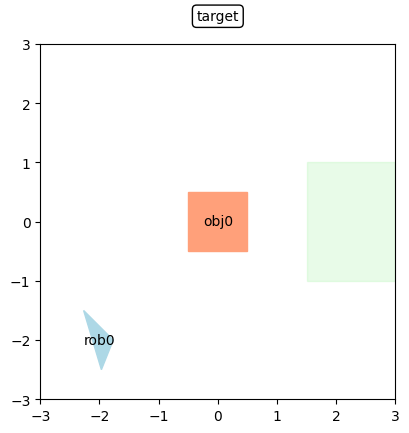

In [28]:
anim = cg.animate_solution()
HTML(anim.to_html5_video())

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmp3ts63hli/temp.m4v


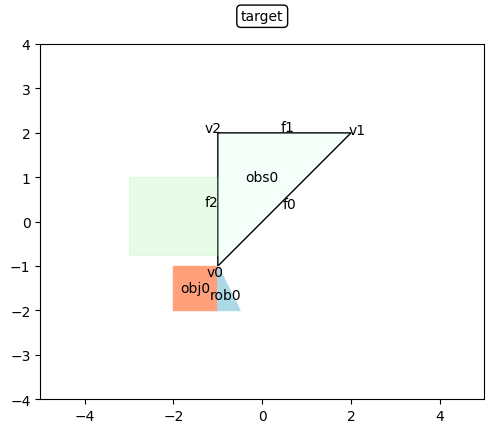

In [20]:
anim = cg.animate_solution()
HTML(anim.to_html5_video())